<a href="https://colab.research.google.com/github/Atircharlotte/1102--math_sw_application/blob/main/%E7%94%A8%E9%81%B7%E7%A7%BB%E5%AD%B8%E7%BF%92%E6%89%93%E9%80%A0%E7%8C%A9%E7%8C%A9%EF%BC%8C%E7%8D%BC%E7%8C%B4%E8%88%87%E7%8B%92%E7%8B%92%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

挑戰利用5張猩猩,5張獼猴和和5張狒狒的照片，來打造一個會分辨猩猩,獼猴,狒狒的神經網路！

-->匯入需要的工具

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1.讀入猩猩、獼猴、狒狒的資料圖檔

把在github的猩猩,獼猴和狒狒的照片讀進來


In [ ]:
!wget --no-check-certificate \
https://github.com/Atircharlotte/1102--math_sw_application/raw/main/monkeys.zip -O /content/monkeys.zip


--2022-05-01 12:25:44--  https://github.com/Atircharlotte/1102--math_sw_application/raw/main/monkeys.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Atircharlotte/1102--math_sw_application/main/monkeys.zip [following]
--2022-05-01 12:25:45--  https://raw.githubusercontent.com/Atircharlotte/1102--math_sw_application/main/monkeys.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1747140 (1.7M) [application/zip]
Saving to: ‘/content/monkeys.zip’

/content/monkeys.zi 100%[===================>]   1.67M  2.52MB/s    in 0.7s    

2022-05-01 12:25:46 (2.52 MB/s) - ‘/content/monkeys.zip’ saved [174

把zip檔解壓縮

In [ ]:
import os
import zipfile

local_zip = '/content/monkeys.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content') #解壓縮
zip_ref.close()

！！注意！！使用mac的朋友們，

> 建立zip檔的時候finder會創建.Ds_store文件(.Ds_store文件包含有關如何打開文件的元數據或目錄，包括圖標顯示，大小和最近打開的時間。)
必須先從終端機將.Ds_store文件刪除，
或將檔案解壓縮後檢查資料夾分是否有.DS_store檔，將其刪除（否則將無法辨識檔案，妨礙照片的讀取）






刪除.Ds_store檔

In [ ]:
#os.remove("/content/monkeys/gorilla/.DS_Store")


In [ ]:
#os.remove("/content/monkeys/macaque/.DS_Store")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.把猩猩和獼猴的照片轉為訓練資料

In [ ]:
base_dir = "/content/monkeys/"

In [ ]:
monkeys_folders = ["baboon", "gorilla", "macaque"]

In [ ]:
monkeys_folders[1]

'gorilla'

資料夾的路徑+確認資料夾裡是否有.Ds_store
(如果有，在解壓縮檔的下面執行刪除Ds_store.)

In [ ]:
thedir = base_dir + monkeys_folders[2]
os.listdir(thedir)

['macaque1.jpeg',
 'macaque 5.jpeg',
 'macaque2.jpeg',
 'macaque3.jpeg',
 'macaque4.jpeg']

In [ ]:
thedir = base_dir + monkeys_folders[1]
os.listdir(thedir)

['gorilla3.jpeg',
 'gorilla1.jpeg',
 'gorilla5.jpeg',
 'gorilla4.jpeg',
 'gorilla2.jpeg']

In [ ]:
thedir = base_dir + monkeys_folders[0]
os.listdir(thedir)

['baboon1.jpeg',
 'baboon4.jpeg',
 'baboon3.jpeg',
 'baboon5.jpeg',
 'baboon2.jpeg']

將照片放進對應的資料夾

In [ ]:
data = []
target = []

for i in range(3):
  thedir = base_dir + monkeys_folders[i]
  monkey_fnames = os.listdir(thedir) #讀檔名
  for monkey in monkey_fnames:
    img = load_img(thedir + "/" + monkey, target_size = (256,256))
    x = np.array(img)
    data.append(x)
    target.append(i)

將照片轉為陣列

In [ ]:
data = np.array(data)

確認有幾張照片

In [ ]:
len(data)

15

看看第一張照片

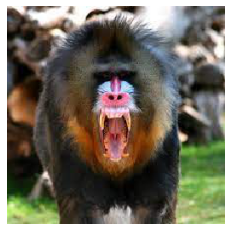

In [ ]:
n=1
plt.axis('off')
plt.imshow(data[n]);

看看答案

In [ ]:
target[n]

0

調整圖片顯示

In [ ]:
x_train = preprocess_input(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


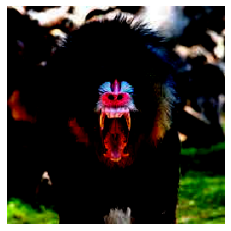

In [ ]:
plt.axis('off')
plt.imshow(x_train[n]);

做one-hot encoding

In [ ]:
y_train = to_categorical(target,3)

In [ ]:
y_train[n]

array([1., 0., 0.], dtype=float32)

##使用ResNet50 打造神經網路

In [ ]:
resnet = ResNet50V2(include_top = False, pooling = "avg")

In [ ]:
resnet.trainable = False

##打造遷移學習的空白函數學習機

In [ ]:
model = Sequential()

In [ ]:
model.add(resnet)

In [ ]:
model.add(Dense(3,activation = "softmax"))

##組裝函數學習機

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

看看神經網路

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


##開始訓練

In [ ]:
model.fit(x_train, y_train, batch_size = 3, epochs=15)

Epoch 1/15
5/5 [==============================] - 5s 488ms/step - loss: 1.7478 - accuracy: 0.0667
Epoch 2/15
5/5 [==============================] - 2s 488ms/step - loss: 0.7806 - accuracy: 0.7333
Epoch 3/15
5/5 [==============================] - 2s 487ms/step - loss: 0.3300 - accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 2s 495ms/step - loss: 0.1579 - accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 2s 490ms/step - loss: 0.0834 - accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 2s 491ms/step - loss: 0.0516 - accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 2s 488ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 2s 496ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 2s 485ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 2s 489ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 11/15
5/5 [==

In [ ]:
y_predict = np.argmax(model.predict(x_train), -1)

In [ ]:
y_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [ ]:
target

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [ ]:
labels = ["狒狒","猩猩","獼猴"]

##用gradio打造辨識打造辨識app!

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def classify_image(inp):
  inp = inp.reshape((-1, 256, 256, 3))
  inp = preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(3)} #辨別的種類有三類

image = gr.inputs.Image(shape=(256, 256), label="猴子照片")
label = gr.outputs.Label(num_top_classes=3, label="AI辨識結果") #輸出前三名

完成AI猴子辨識機！（可以上傳自己的照片，看看自己被辨識成哪一種～）

In [ ]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
             title="AI 猴子辨識機",
             description="我能辨識三種猴子: 狒狒、猩猩、獼猴。不知道這是什麼猴？我來幫你!",
             capture_session=True).launch()

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:248: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58923.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7ff191b2a910>,
 'http://127.0.0.1:7862/',
 'https://58923.gradio.app')